# Hepatitis C Data Exploration

This notebook explores the hepatitis C dataset to understand the data structure, quality, and patterns. This is the first step in our data science workflow following the Cookiecutter Data Science structure.

## Objectives
- Load and examine the raw dataset
- Understand data quality and missing values
- Explore feature distributions
- Identify patterns and relationships
- Prepare insights for preprocessing

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src directory to path to import our custom modules
sys.path.append('../src')
from data import load_raw_data, get_data_info
from visualization import plot_data_overview, plot_correlation_matrix, plot_feature_distributions

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load the Dataset

First, let's load the raw hepatitis C dataset and examine its basic structure.

In [2]:
# Load the dataset
df = load_raw_data('../data/raw/hepatitis_data.csv')

if df is not None:
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nFirst 5 rows:")
    display(df.head())
else:
    print("❌ Dataset not found. Please ensure the data file is in the correct location.")

✅ Dataset loaded successfully: (615, 14)
Dataset shape: (615, 14)
Columns: ['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

First 5 rows:


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## 2. Data Quality Assessment

Let's examine the data quality, including missing values, data types, and basic statistics.

In [3]:
# Get detailed data information
if df is not None:
    info = get_data_info(df)
    
    print("=== DATASET INFORMATION ===")
    print(f"Shape: {info['shape']}")
    print(f"Columns: {info['columns']}")
    
    print("\n=== DATA TYPES ===")
    print(info['data_types'])
    
    print("\n=== MISSING VALUES ===")
    missing = info['missing_values']
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found")
    
    print("\n=== TARGET DISTRIBUTION ===")
    if info['target_distribution'] is not None:
        print(info['target_distribution'])
    
    print("\n=== BASIC STATISTICS ===")
    display(df.describe())

=== DATASET INFORMATION ===
Shape: (615, 14)
Columns: ['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

=== DATA TYPES ===
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

=== MISSING VALUES ===
ALB      1
ALP     18
ALT      1
CHOL    10
PROT     1
dtype: int64

=== TARGET DISTRIBUTION ===
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

=== BASIC STATISTICS ===


,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


## 3. Data Visualization

Let's create visualizations to better understand the data patterns and distributions.

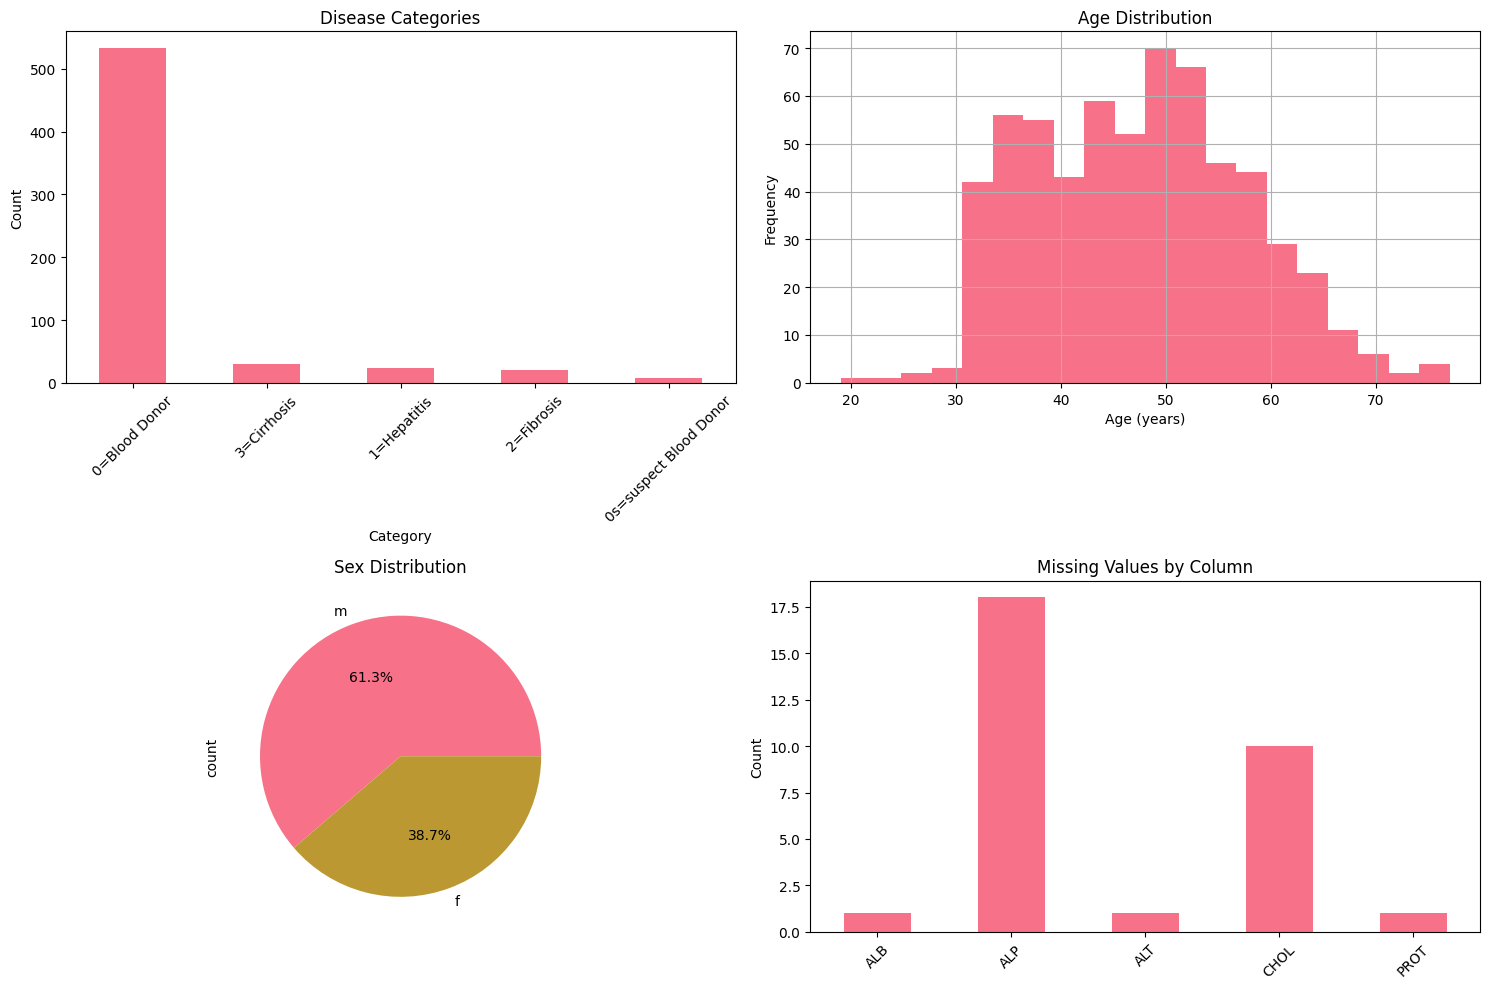

✅ Data overview plot saved to reports/figures/data_overview.png


In [4]:
# Create overview plots
if df is not None:
    fig = plot_data_overview(df)
    plt.savefig('../reports/figures/data_overview.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Data overview plot saved to reports/figures/data_overview.png")

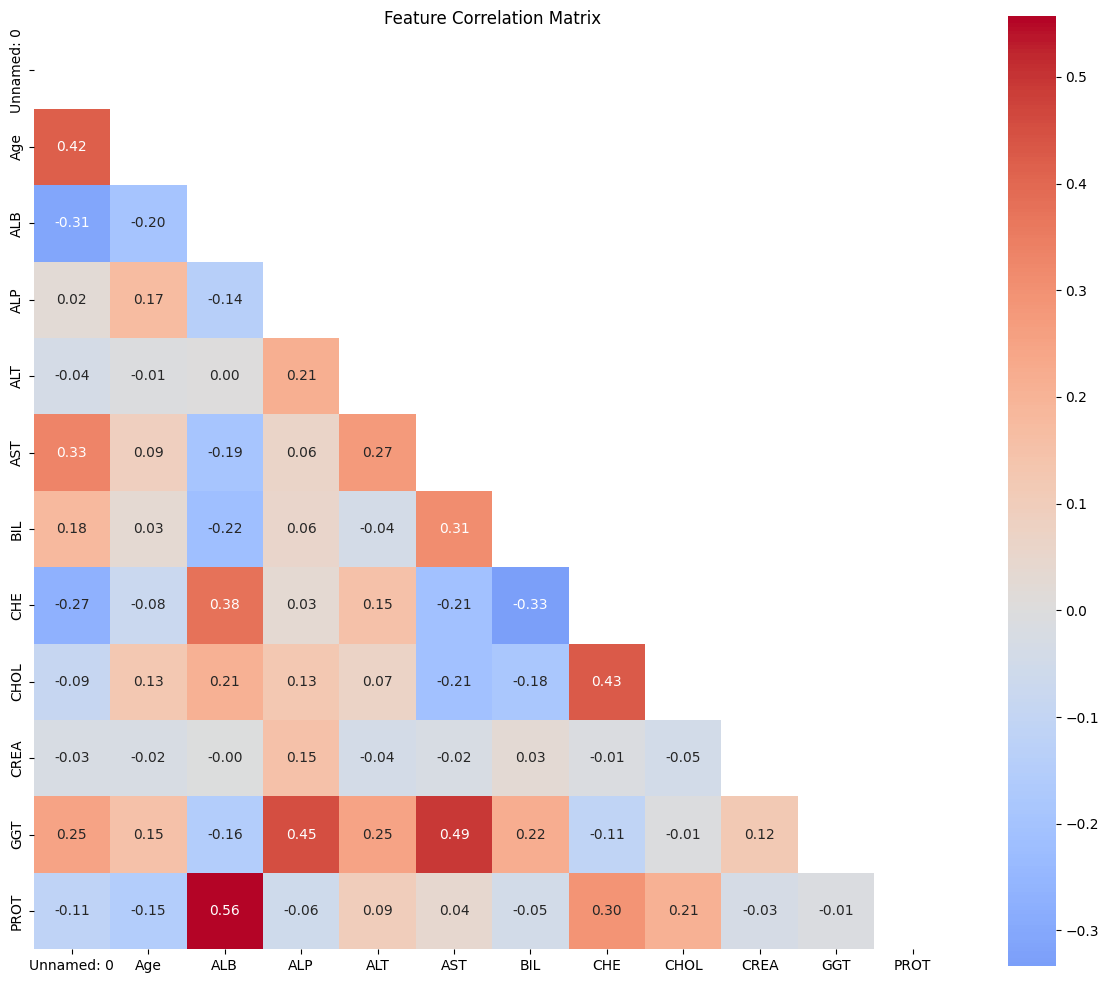

✅ Correlation matrix saved to reports/figures/correlation_matrix.png


In [5]:
# Plot correlation matrix
if df is not None:
    fig = plot_correlation_matrix(df)
    if fig is not None:
        plt.savefig('../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Correlation matrix saved to reports/figures/correlation_matrix.png")

## 4. Feature Analysis

Let's examine the individual features and their relationships with the target variable.

=== BINARY TARGET DISTRIBUTION ===
Healthy (0): 540 samples (87.8%)
Hepatitis C (1): 75 samples (12.2%)


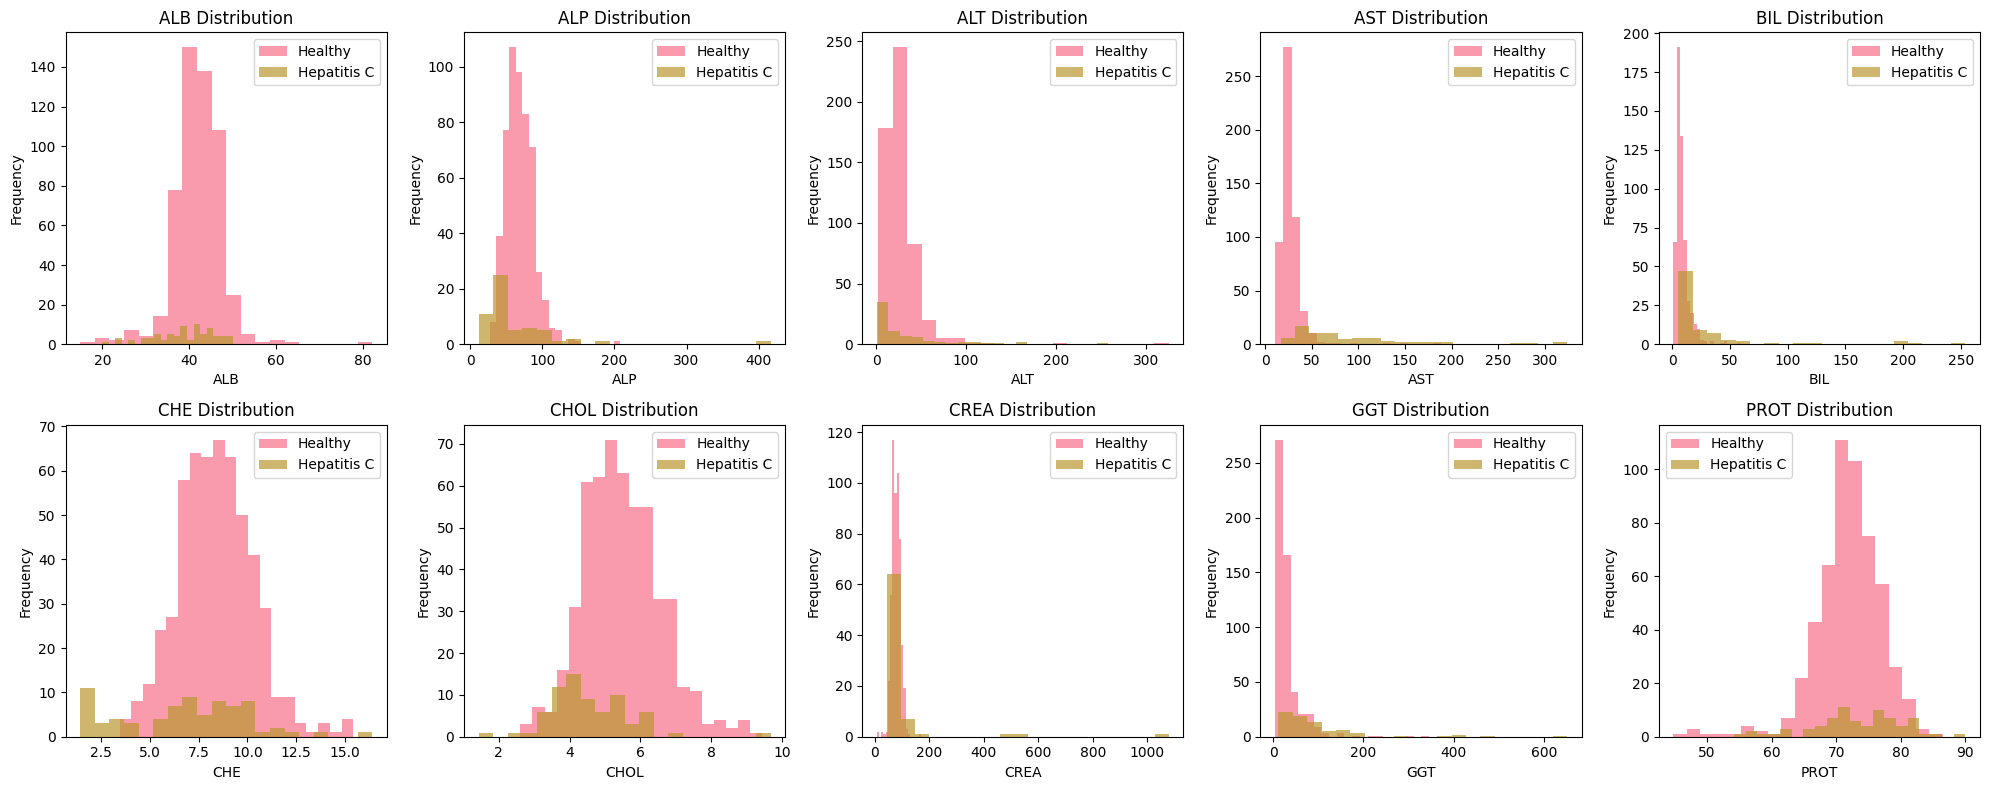

✅ Feature distributions saved to reports/figures/feature_distributions.png


In [6]:
# Create binary target for analysis
if df is not None:
    # Simplify categories for binary classification
    df_analysis = df.copy()
    
    def simplify_category(category):
        if category in ['0=Blood Donor', '0s=suspect Blood Donor']:
            return 0  # Healthy
        else:
            return 1  # Hepatitis C
    
    df_analysis['target'] = df_analysis['Category'].apply(simplify_category)
    
    print("=== BINARY TARGET DISTRIBUTION ===")
    target_counts = df_analysis['target'].value_counts()
    print(f"Healthy (0): {target_counts[0]} samples ({target_counts[0]/len(df_analysis)*100:.1f}%)")
    print(f"Hepatitis C (1): {target_counts[1]} samples ({target_counts[1]/len(df_analysis)*100:.1f}%)")
    
    # Plot feature distributions by target
    fig = plot_feature_distributions(df_analysis, 'target')
    if fig is not None:
        plt.savefig('../reports/figures/feature_distributions.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Feature distributions saved to reports/figures/feature_distributions.png")

## 5. Key Insights and Next Steps

Based on our exploration, let's summarize the key findings and plan the next steps.

In [7]:
# Summary of findings
if df is not None:
    print("=== DATA EXPLORATION SUMMARY ===")
    print(f"📊 Dataset size: {df.shape[0]} samples, {df.shape[1]} features")
    print(f"🎯 Target classes: Binary (Healthy vs Hepatitis C)")
    print(f"⚠️  Class imbalance: ~88% healthy, ~12% hepatitis C")
    print(f"❓ Missing values: {df.isnull().sum().sum()} total")
    print(f"🧪 Laboratory features: 10 numeric measurements")
    print(f"👤 Demographic features: Age and Sex")
    
    print("\n=== NEXT STEPS ===")
    print("1. ✅ Data preprocessing (handle missing values, encode categorical)")
    print("2. ✅ Feature scaling and normalization") 
    print("3. ✅ Train neural network model")
    print("4. ✅ Evaluate model performance")
    print("5. ✅ Create prediction interface")
    
    print("\n=== FILES SAVED ===")
    print("📁 reports/figures/data_overview.png")
    print("📁 reports/figures/correlation_matrix.png")
    print("📁 reports/figures/feature_distributions.png")
    
    print("\n✅ Data exploration completed successfully!")
    print("👉 Next: Run notebook 02-data-preprocessing.ipynb")

=== DATA EXPLORATION SUMMARY ===
📊 Dataset size: 615 samples, 14 features
🎯 Target classes: Binary (Healthy vs Hepatitis C)
⚠️  Class imbalance: ~88% healthy, ~12% hepatitis C
❓ Missing values: 31 total
🧪 Laboratory features: 10 numeric measurements
👤 Demographic features: Age and Sex

=== NEXT STEPS ===
1. ✅ Data preprocessing (handle missing values, encode categorical)
2. ✅ Feature scaling and normalization
3. ✅ Train neural network model
4. ✅ Evaluate model performance
5. ✅ Create prediction interface

=== FILES SAVED ===
📁 reports/figures/data_overview.png
📁 reports/figures/correlation_matrix.png
📁 reports/figures/feature_distributions.png

✅ Data exploration completed successfully!
👉 Next: Run notebook 02-data-preprocessing.ipynb
